# Preprocessing - Balancing Data

Kriteria Tugas :

1. Download dataset ecoli dari UCI https://archive.ics.uci.edu/dataset/39/ecoli
2. Simpan didatabase MySQL
3. Tampilkan data dalam scatter plot  menggunakan PCA.
   PCA mentransformasi data menjadi dimensi rendah (2)
4. Lakukan penyeimbangan data menggunakan ADASYN
5. Ploting data dari data yang diimbangkan menggunakan PCA, tandai data data hasil generatenya

Penjelasan lebih lengkap mengenai Oversampling : https://hackmd.io/@ProyekSaindData/BJE4Lopsee

## Mengambil data dari MySql

In [8]:
!pip install pymysql
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [23]:
import pymysql

# Konfigurasi koneksi
host = "mysqlpendata-ilhamalmafazt-dm.h.aivencloud.com"  # Ganti host dengan host dari Aiven.io
port = 19867
user = "avnadmin"
password = "AVNS_vnxDk9lOvZgFnuKlezN"
database = "ecoli"

# Buat koneksi
mysql_conn = pymysql.connect(
    host=host,
    port=port,
    user=user,
    password=password,
    database=database,
    ssl={'ssl': {}}  # Jika menggunakan SSL
)

cursor = mysql_conn.cursor()
cursor.execute("SELECT * FROM ecoli.ecoli_data LIMIT 5;")
tampil = cursor.fetchall()
for data in tampil:
    print(data)
mysql_conn.close()

('AAS_ECOLI', 0.44, 0.52, 0.48, 0.5, 0.43, 0.47, 0.54, 'im')
('AAT_ECOLI', 0.49, 0.29, 0.48, 0.5, 0.56, 0.24, 0.35, 'cp')
('ACEA_ECOLI', 0.07, 0.4, 0.48, 0.5, 0.54, 0.35, 0.44, 'cp')
('ACEK_ECOLI', 0.56, 0.4, 0.48, 0.5, 0.49, 0.37, 0.46, 'cp')
('ACKA_ECOLI', 0.59, 0.49, 0.48, 0.5, 0.52, 0.45, 0.36, 'cp')


### Menampilkan PCA

/tmp/ipython-input-622454543.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, mysql_conn)


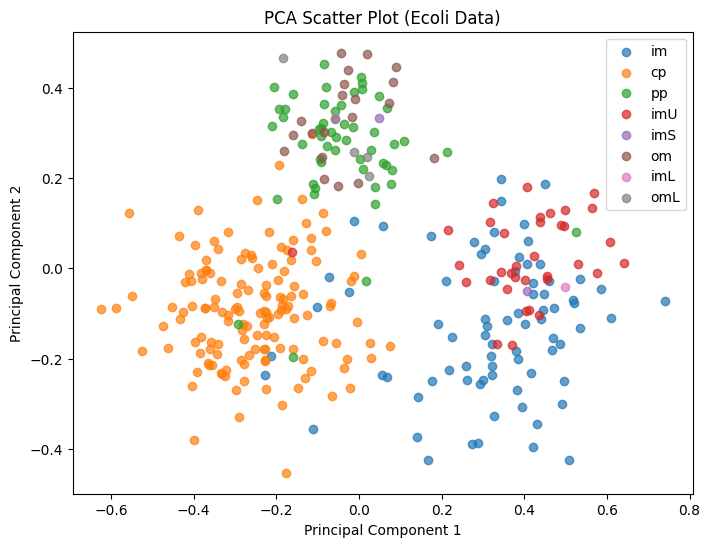

In [29]:
import pymysql
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Konfigurasi koneksi
host = "mysqlpendata-ilhamalmafazt-dm.h.aivencloud.com"
port = 19867
user = "avnadmin"
password = "AVNS_vnxDk9lOvZgFnuKlezN"
database = "defaultdb"

# Buat koneksi
mysql_conn = pymysql.connect(
    host=host,
    port=port,
    user=user,
    password=password,
    database=database,
    ssl={'ssl': {}}
)

# Ambil data ke DataFrame
query = "SELECT * FROM ecoli.ecoli_data;"
df = pd.read_sql(query, mysql_conn)

mysql_conn.close()

# Pisahkan fitur numerik (buang kolom string seperti Sequence & class)
X = df.drop(columns=["Sequence", "class"])

# Lakukan PCA ke 2 dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Buat DataFrame hasil PCA
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["class"] = df["class"]  # tambahkan class untuk label warna

# Scatter plot
plt.figure(figsize=(8,6))
for c in df_pca["class"].unique():
    subset = df_pca[df_pca["class"] == c]
    plt.scatter(subset["PC1"], subset["PC2"], label=c, alpha=0.7)

plt.title("PCA Scatter Plot (Ecoli Data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()
